In [127]:
# from google.colab import files
# uploaded = files.upload()

import io
data = io.BytesIO(uploaded['credit_card_approval_data.csv'])  

import pandas as pd   
df = pd.read_csv(data)

df.head()

,Gender,Marital_Status,Education,Employment,ApplicantIncome_Label,LoanAmount_Label,Credit_History,Property_Area,Decision
0,Male,Not_Married,Graduate,Salaried,High_Income,Few,Present,Urban,Deny
1,Male,Married,Graduate,Salaried,Low_Income,More,Present,Rural,Approve
2,Male,Married,Graduate,Self_Employed,High_Income,Few,Present,Urban,Deny
3,Male,Married,Not Graduate,Salaried,High_Income,Few,Present,Urban,Deny
4,Male,Not_Married,Graduate,Salaried,High_Income,More,Present,Urban,Deny


In [118]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [128]:
dummy_coded_data = pd.concat([df['Decision'],                   
                     pd.get_dummies(df.Gender,drop_first=True),
                     pd.get_dummies(df.Marital_Status,drop_first=True),
                    pd.get_dummies(df.Education,drop_first=True),
                    pd.get_dummies(df.Employment,drop_first=True),
                    pd.get_dummies(df.ApplicantIncome_Label,drop_first=True),
                    pd.get_dummies(df.LoanAmount_Label,drop_first=True),
                    pd.get_dummies(df.Credit_History,drop_first=True),
                    pd.get_dummies(df.Property_Area,drop_first=True)], axis=1)
dummy_coded_data.head()

,Decision,Male,Not_Married,Not Graduate,Self_Employed,Low_Income,More,Present,Semiurban,Urban
0,Deny,1,1,0,0,0,0,1,0,1
1,Approve,1,0,0,0,1,1,1,0,0
2,Deny,1,0,0,1,0,0,1,0,1
3,Deny,1,0,1,0,0,0,1,0,1
4,Deny,1,1,0,0,0,1,1,0,1


In [95]:
from sklearn import tree

In [129]:
X = dummy_coded_data.drop(['Decision'], axis=1)
y = dummy_coded_data['Decision']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [130]:
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
# model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
# tree.plot_tree(model)

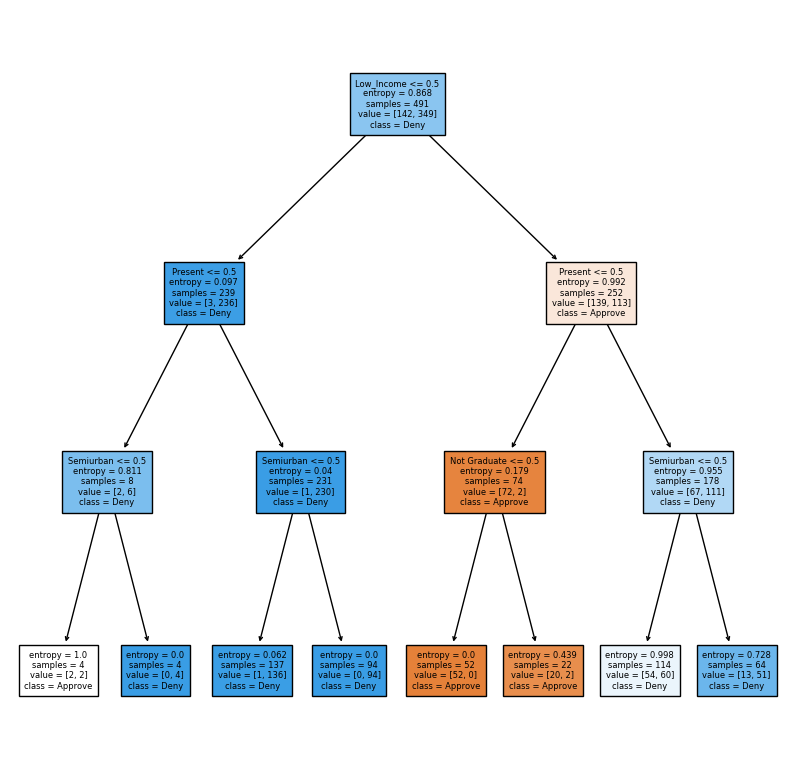

In [131]:
import matplotlib.pyplot as plt
fn=['Male','Not_Married','Not Graduate','Self_Employed','Low_Income','More','Present','Semiurban','Urban']      
cn=['Approve', 'Deny']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=100)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               fontsize=6,
              #  max_depth = 2,
               filled = True);

Rule-1 - If Income is low and your credit history is present and not staying in a semi urban palce then card 
is denied.</br>
Rule-2 - If Income is low and your credit history is not present then the application is denied </br>
Rule-3 - If income is High and your credit history is present and your edcation qualification is either 
a graduate or not the application can be approved </br>
Rule-4 - If income is High and your credit history is not presentand not staying in a semi urban palce 
then card is denied

In [132]:
from sklearn.ensemble import RandomForestClassifier

X = dummy_coded_data.drop(['Decision'], axis=1)
y = dummy_coded_data['Decision']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# creating a RF classifier
clf = RandomForestClassifier(random_state = 42) 
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
from sklearn.metrics import accuracy_score

# Test Accuracy
rf_pred = clf.predict(X_test)
score = accuracy_score(y_test, rf_pred)
score 

0.8861788617886179

In [134]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[21  8]
 [ 6 88]]


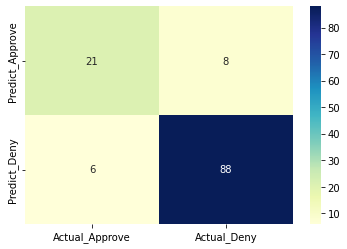

In [135]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual_Approve', 'Actual_Deny'], 
                                 index=['Predict_Approve', 'Predict_Deny'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [136]:
# Train Data Accuracy
rf_pred_train = clf.predict(X_train)
score = accuracy_score(y_train, rf_pred_train)
score

0.8940936863543788

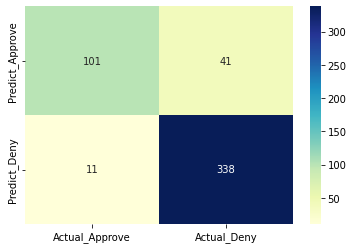

In [137]:
cm = confusion_matrix(y_train, rf_pred_train)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual_Approve', 'Actual_Deny'], 
                                 index=['Predict_Approve', 'Predict_Deny'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')